In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv(r'Data_Salaries.csv')
data

,Company,Company Score,Job Title,Location,Salary
0,PepsiCo,3.9,2025 Summer Intern: R&D,"Plano, TX",$21.50 - $55.40 Per Hour (Employer est.)
1,ghSMART,4.8,Data Engineer Intern,Remote,$20.00 - $30.00 Per Hour (Employer est.)
2,PepsiCo,3.9,2025 Summer Intern: eCommerce Data Science,United States,$21.50 - $40.19 Per Hour (Employer est.)
3,U.S. Bank National Association,3.6,2025 Data Analytics Summer Intern,"Minneapolis, MN",$20.63 - $30.25 Per Hour (Employer est.)
4,Plymouth Rock Assurance,3.4,Fall 2024 Data Science/Predictive Modeler Intern,"Woodbridge, NJ",$77K - $130K (Glassdoor est.)
...,...,...,...,...,...
644,Chartwells Higher Education,NaN,Cytometry Technician,"Pasadena, CA",NaN
645,KeyBank,NaN,"Marketing Intern, Chartwells Higher Ed + Boost...","Rochester, NY",NaN
646,Bomie LLC,NaN,"2025 Summer Key's Technology, Operations & Ser...","Brooklyn, OH",NaN
647,"Alliance For Change, LLC",NaN,Livestream Assistant- Mandarin Speaking,United States,NaN


In [3]:
data.describe(include="all")

,Company,Company Score,Job Title,Location,Salary
count,648,551.000000,649,642,503
unique,492,NaN,616,324,364
top,TikTok,NaN,Engineering Intern,United States,$20.00 Per Hour (Employer est.)
freq,14,NaN,6,43,15
mean,NaN,3.739927,NaN,NaN,NaN
std,NaN,0.510012,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN
25%,NaN,3.500000,NaN,NaN,NaN
50%,NaN,3.800000,NaN,NaN,NaN
75%,NaN,4.000000,NaN,NaN,NaN


In [4]:
data = data.drop(["Company"], axis=1)

In [5]:
import re

def calculate_mean(wage_string):
    if isinstance(wage_string, str):
        # Handle format with dollars and cents
        match = re.search(r'\$(\d+\.\d+) - \$(\d+\.\d+)', wage_string)
        if match:
            min_value = float(match.group(1))
            max_value = float(match.group(2))
            mean_value = (min_value + max_value) / 2
            return mean_value

        match = re.search(r'\$(\d+\.\d+)', wage_string)
        if match:
            value = float(match.group(1))
            return value

        match = re.search(r'\$(\d+)K', wage_string)
        if match:
            value = float(match.group(1))
            return value
        
        # Handle format with thousands (e.g., $49K - $68K)
        match = re.search(r'\$(\d+)K - \$(\d+)K', wage_string)
        if match:
            min_value = float(match.group(1)) * 1000
            max_value = float(match.group(2)) * 1000
            mean_value = (min_value + max_value) / 2
            return mean_value/2080

    return None

data['Mean_Salary'] = data['Salary'].apply(calculate_mean)

In [6]:
data = data.drop(["Salary"], axis=1)

In [13]:
data.describe(include="all")

,Company Score,Job Title,Location,Mean_Salary
count,551.000000,649,642,503.000000
unique,NaN,616,324,NaN
top,NaN,Engineering Intern,United States,NaN
freq,NaN,6,43,NaN
mean,3.739927,NaN,NaN,37.461074
std,0.510012,NaN,NaN,21.968819
min,1.000000,NaN,NaN,1.000000
25%,3.500000,NaN,NaN,20.000000
50%,3.800000,NaN,NaN,33.000000
75%,4.000000,NaN,NaN,50.250000


In [15]:
data.isnull().sum()

Company Score     98
Job Title          0
Location           7
Mean_Salary      146
dtype: int64

In [17]:
for i in ['Company Score', 'Location']:
    data[i] = data[i].fillna(data[i].mode()[0])

In [19]:
data["Mean_Salary"] = data["Mean_Salary"].fillna(data["Mean_Salary"].mean())

In [21]:
data.isnull().sum()

Company Score    0
Job Title        0
Location         0
Mean_Salary      0
dtype: int64

In [23]:
data.describe(include="all")

,Company Score,Job Title,Location,Mean_Salary
count,649.000000,649,649,649.000000
unique,NaN,616,324,NaN
top,NaN,Engineering Intern,United States,NaN
freq,NaN,6,50,NaN
mean,3.748998,NaN,NaN,37.461074
std,0.470359,NaN,NaN,19.336197
min,1.000000,NaN,NaN,1.000000
25%,3.500000,NaN,NaN,22.540000
50%,3.800000,NaN,NaN,37.461074
75%,4.000000,NaN,NaN,44.000000


In [25]:
def classify_internship(title):
    title_lower = title.lower()
    if 'data' in title_lower or 'analytics' in title_lower or 'ai' in title_lower:
        return 'Data and Analytics'
    elif 'engineer' in title_lower or 'engineering' in title_lower or 'software' in title_lower:
        return 'Engineering'
    elif 'business' in title_lower or 'marketing' in title_lower or 'sales' in title_lower:
        return 'Business and Marketing'
    elif 'finance' in title_lower or 'accounting' in title_lower:
        return 'Finance and Accounting'
    elif 'research' in title_lower or 'development' in title_lower or 'r&d' in title_lower:
        return 'Research and Development'
    elif 'technology' in title_lower or 'it' in title_lower:
        return 'Technology and IT'
    elif 'government' in title_lower or 'policy' in title_lower:
        return 'Government and Policy'
    else:
        return 'Others'

In [27]:
data["Jobs"] = data["Job Title"].apply(classify_internship)

In [29]:
data

,Company Score,Job Title,Location,Mean_Salary,Jobs
0,3.9,2025 Summer Intern: R&D,"Plano, TX",38.450000,Research and Development
1,4.8,Data Engineer Intern,Remote,25.000000,Data and Analytics
2,3.9,2025 Summer Intern: eCommerce Data Science,United States,30.845000,Data and Analytics
3,3.6,2025 Data Analytics Summer Intern,"Minneapolis, MN",25.440000,Data and Analytics
4,3.4,Fall 2024 Data Science/Predictive Modeler Intern,"Woodbridge, NJ",77.000000,Data and Analytics
...,...,...,...,...,...
644,3.8,Cytometry Technician,"Pasadena, CA",37.461074,Others
645,3.8,"Marketing Intern, Chartwells Higher Ed + Boost...","Rochester, NY",37.461074,Business and Marketing
646,3.8,"2025 Summer Key's Technology, Operations & Ser...","Brooklyn, OH",37.461074,Technology and IT
647,3.8,Livestream Assistant- Mandarin Speaking,United States,37.461074,Others


In [31]:
data=data.drop(["Job Title"], axis=1)

In [33]:
data

,Company Score,Location,Mean_Salary,Jobs
0,3.9,"Plano, TX",38.450000,Research and Development
1,4.8,Remote,25.000000,Data and Analytics
2,3.9,United States,30.845000,Data and Analytics
3,3.6,"Minneapolis, MN",25.440000,Data and Analytics
4,3.4,"Woodbridge, NJ",77.000000,Data and Analytics
...,...,...,...,...
644,3.8,"Pasadena, CA",37.461074,Others
645,3.8,"Rochester, NY",37.461074,Business and Marketing
646,3.8,"Brooklyn, OH",37.461074,Technology and IT
647,3.8,United States,37.461074,Others


In [35]:
def extract_state(location):
    # Check if location contains a comma
    if ',' in location:
        # Split by comma and extract the last two characters of the second part
        parts = location.split(',')
        return parts[-1].strip()[-2:]
    else:
        # Use the location itself if no comma is present
        return location

In [37]:
data["location"] = data["Location"].apply(extract_state)

In [39]:
data

,Company Score,Location,Mean_Salary,Jobs,location
0,3.9,"Plano, TX",38.450000,Research and Development,TX
1,4.8,Remote,25.000000,Data and Analytics,Remote
2,3.9,United States,30.845000,Data and Analytics,United States
3,3.6,"Minneapolis, MN",25.440000,Data and Analytics,MN
4,3.4,"Woodbridge, NJ",77.000000,Data and Analytics,NJ
...,...,...,...,...,...
644,3.8,"Pasadena, CA",37.461074,Others,CA
645,3.8,"Rochester, NY",37.461074,Business and Marketing,NY
646,3.8,"Brooklyn, OH",37.461074,Technology and IT,OH
647,3.8,United States,37.461074,Others,United States


In [41]:
data.describe(include="all")

,Company Score,Location,Mean_Salary,Jobs,location
count,649.000000,649,649.000000,649,649
unique,NaN,324,NaN,8,61
top,NaN,United States,NaN,Others,CA
freq,NaN,50,NaN,216,69
mean,3.748998,NaN,37.461074,NaN,NaN
std,0.470359,NaN,19.336197,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN
25%,3.500000,NaN,22.540000,NaN,NaN
50%,3.800000,NaN,37.461074,NaN,NaN
75%,4.000000,NaN,44.000000,NaN,NaN


In [43]:
data = data.drop(["Location"], axis=1)

In [45]:
data

,Company Score,Mean_Salary,Jobs,location
0,3.9,38.450000,Research and Development,TX
1,4.8,25.000000,Data and Analytics,Remote
2,3.9,30.845000,Data and Analytics,United States
3,3.6,25.440000,Data and Analytics,MN
4,3.4,77.000000,Data and Analytics,NJ
...,...,...,...,...
644,3.8,37.461074,Others,CA
645,3.8,37.461074,Business and Marketing,NY
646,3.8,37.461074,Technology and IT,OH
647,3.8,37.461074,Others,United States


In [49]:
north = ["MN WI MI NY NE IA VT IN".split()]+["Iowa"]
south = ["TX SC GA TN AR FL AL KY LA PR".split()]+["Texas"]
west = ["WA OR CA ID CO UT AZ MT AK HI KS SD".split()]+["Colorado", "Idaho", "California", "Alaska"]
east = ["NJ CT PA MD VA DC RI MA DE".split()]+["Connecticut", "Pennsylvania", "Upper Providence Township"]
central = ["OH IL MO".split()]
northwest = ["WA OR ID MT".split()]
northeast = ["NY NJ CT MA VT NH".split()]+["New York State", "New Jersey", "Manhattan"]
southwest = ["TX BN AZ NV OK NM".split()]+["Oklahoma"]
southeast = ["FL GA SC AL TN NC VA WV".split()]+["Georgia", "Florida"]

In [51]:
replacements = {
    'north': north,
    'south': south,
    'west': west,
    'east': east,
    "central": central,
    'northwest': northwest,
    'northeast': northeast,
    'southwest': southwest,
    'southeast': southeast
}

for region, states in replacements.items():
    for state in states:
        data['location'] = data['location'].replace(state, region)

In [53]:
data

,Company Score,Mean_Salary,Jobs,location
0,3.9,38.450000,Research and Development,south
1,4.8,25.000000,Data and Analytics,Remote
2,3.9,30.845000,Data and Analytics,United States
3,3.6,25.440000,Data and Analytics,north
4,3.4,77.000000,Data and Analytics,east
...,...,...,...,...
644,3.8,37.461074,Others,west
645,3.8,37.461074,Business and Marketing,north
646,3.8,37.461074,Technology and IT,central
647,3.8,37.461074,Others,United States


In [55]:
data["location"].unique()

array(['south', 'Remote', 'United States', 'north', 'east', 'central',
       'west', 'southwest', 'northeast', 'southeast'], dtype=object)

In [57]:
data.describe(include="all")

,Company Score,Mean_Salary,Jobs,location
count,649.000000,649.000000,649,649
unique,NaN,NaN,8,10
top,NaN,NaN,Others,east
freq,NaN,NaN,216,132
mean,3.748998,37.461074,NaN,NaN
std,0.470359,19.336197,NaN,NaN
min,1.000000,1.000000,NaN,NaN
25%,3.500000,22.540000,NaN,NaN
50%,3.800000,37.461074,NaN,NaN
75%,4.000000,44.000000,NaN,NaN


In [59]:
data["Mean_Salary"] = data["Mean_Salary"].round(2)

In [61]:
data

,Company Score,Mean_Salary,Jobs,location
0,3.9,38.45,Research and Development,south
1,4.8,25.00,Data and Analytics,Remote
2,3.9,30.84,Data and Analytics,United States
3,3.6,25.44,Data and Analytics,north
4,3.4,77.00,Data and Analytics,east
...,...,...,...,...
644,3.8,37.46,Others,west
645,3.8,37.46,Business and Marketing,north
646,3.8,37.46,Technology and IT,central
647,3.8,37.46,Others,United States


In [63]:
data_num = data[["Company Score", "Mean_Salary"]]
data_num

,Company Score,Mean_Salary
0,3.9,38.45
1,4.8,25.00
2,3.9,30.84
3,3.6,25.44
4,3.4,77.00
...,...,...
644,3.8,37.46
645,3.8,37.46
646,3.8,37.46
647,3.8,37.46


In [65]:
data_num.corr()

,Company Score,Mean_Salary
Company Score,1.000000,0.012046
Mean_Salary,0.012046,1.000000


I don't want to lose any columns so let's keep them

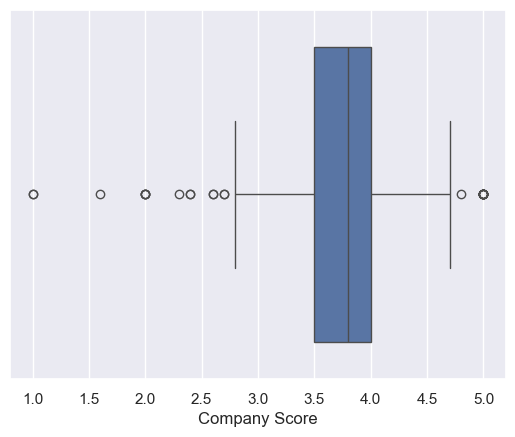

In [72]:
sns.boxplot(x=data["Company Score"], data=data)
plt.show()

In [74]:
q1 = data_num.quantile(0.25)
q3 = data_num.quantile(0.75)
IQR = q3-q1
Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

In [76]:
data["Company Score"] = np.where(data["Company Score"]>Upper["Company Score"], Upper["Company Score"], data["Company Score"])
data["Company Score"] = np.where(data["Company Score"]<Lower["Company Score"], Lower["Company Score"], data["Company Score"])

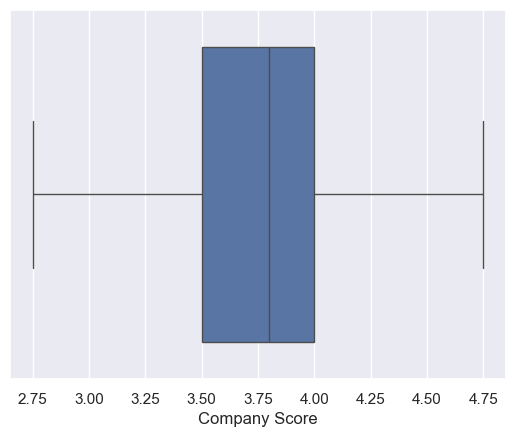

In [78]:
sns.boxplot(x=data["Company Score"], data=data)
plt.show()

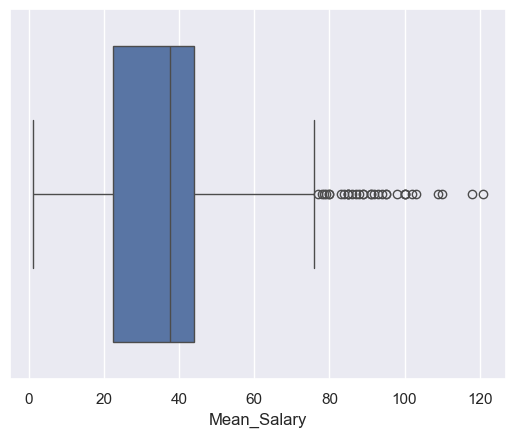

In [80]:
sns.boxplot(x=data["Mean_Salary"], data=data)
plt.show()

In [82]:
data["Mean_Salary"] = np.where(data["Mean_Salary"]>Upper["Mean_Salary"], Upper["Mean_Salary"], data["Mean_Salary"])

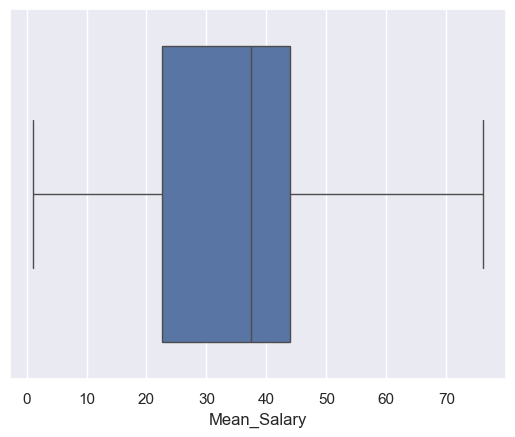

In [84]:
sns.boxplot(x=data["Mean_Salary"], data=data)
plt.show()

In [86]:
data = pd.get_dummies(data, drop_first=True)

In [90]:
data.columns

Index(['Company Score', 'Mean_Salary', 'Jobs_Data and Analytics',
       'Jobs_Engineering', 'Jobs_Finance and Accounting',
       'Jobs_Government and Policy', 'Jobs_Others',
       'Jobs_Research and Development', 'Jobs_Technology and IT',
       'location_United States', 'location_central', 'location_east',
       'location_north', 'location_northeast', 'location_south',
       'location_southeast', 'location_southwest', 'location_west'],
      dtype='object')

In [94]:
data[['Jobs_Data and Analytics',
       'Jobs_Engineering', 'Jobs_Finance and Accounting',
       'Jobs_Government and Policy', 'Jobs_Others',
       'Jobs_Research and Development', 'Jobs_Technology and IT',
       'location_United States', 'location_central', 'location_east',
       'location_north', 'location_northeast', 'location_south',
       'location_southeast', 'location_southwest', 'location_west']] = data[['Jobs_Data and Analytics',
       'Jobs_Engineering', 'Jobs_Finance and Accounting',
       'Jobs_Government and Policy', 'Jobs_Others',
       'Jobs_Research and Development', 'Jobs_Technology and IT',
       'location_United States', 'location_central', 'location_east',
       'location_north', 'location_northeast', 'location_south',
       'location_southeast', 'location_southwest', 'location_west']].astype(int)

In [96]:
data

,Company Score,Mean_Salary,Jobs_Data and Analytics,Jobs_Engineering,Jobs_Finance and Accounting,Jobs_Government and Policy,Jobs_Others,Jobs_Research and Development,Jobs_Technology and IT,location_United States,location_central,location_east,location_north,location_northeast,location_south,location_southeast,location_southwest,location_west
0,3.90,38.45,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,4.75,25.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.90,30.84,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,3.60,25.44,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,3.40,76.19,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,3.80,37.46,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
645,3.80,37.46,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
646,3.80,37.46,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
647,3.80,37.46,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
y = data[]